# Flu Shot Prediction Data Wrangling

Data was downloaded from DrivenData.org for a contest that aims to predict how likely individuals are to get an H1N1 vaccine and/or seasonal flu vaccine. Data comes as 3 files: training set features, test set features and training set labels. The training set features and lables will be most important to my modeling and the test set will be used to submit final predicitons to the competition.

In [1]:
#import necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing data
flu_train = pd.read_csv('./raw_data/training_set_features.csv')
flu_test = pd.read_csv('./raw_data/test_set_features.csv')
flu_train_label = pd.read_csv('./raw_data/training_set_labels.csv')

## First I want to see what the dataframe looks like:

In [3]:
flu_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [4]:
flu_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
flu_train_label.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


## Determining How Much Data is Missing from Each Column:

In [6]:
flu_train.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [7]:
flu_test.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [8]:
flu_train_label.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

There are only 3 columns that have a considerable amount of missing data. These are the health_insurance, employment_industry and employment_occupation columns.

## Shifting ordinal data to begin at 0:

For the data that is already numeric and uses an ordered numbering system, I want all of it to start at zero. This will make visualization and exploratory analysis more straight forward.

In [3]:
#creating a function that shifts all the data in specific ordinal columns down by one integer
def ordinal_1shift(df, columns):
    df2 = df.copy()
    for c in columns:
        df2[c] = df[c] - 1
    return df2

In [4]:
#using this function to shift data to start at 0
column_lst = ['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
flu_train2 = ordinal_1shift(flu_train, column_lst)
flu_test2 = ordinal_1shift(flu_test, column_lst)

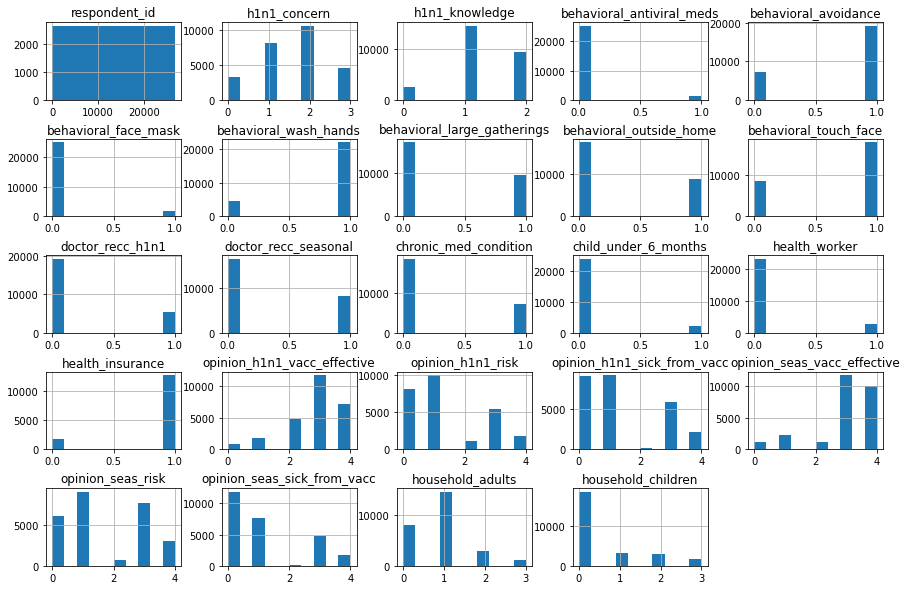

In [11]:
#visualizing distributions of numeric data, now all shifted to start at 0
flu_train2.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

## Mappings for Categorical Data for Visualization Purposes: 

Some columns contain categorical strings and here I am mapping each string to a specific number so that I can visualize the data before moving on

In [13]:
mappings = {'age_group' : {'18 - 34 Years': 0, '35 - 44 Years': 1, '45 - 54 Years': 2, '55 - 64 Years': 3, '65+ Years': 4},
'education' : {'< 12 Years': 0, '12 Years': 1, 'Some College': 2, 'College Graduate': 3},
'income_poverty' : {'Below Poverty': 0, '<= $75,000, Above Poverty': 1, '> $75,000': 2},
'employment_status' : {'Unemployed': 0, 'Employed':1, 'Not in Labor Force': 2},
'rent_or_own' : {'Rent': 0, 'Own': 1},
'sex' : {'Female': 0, 'Male': 1},
'marital_status' : {'Not Married': 0, 'Married': 1},
'race': {'White': 1, 'Black': 2, 'Hispanic' : 3, 'Other or Multiple': 4},
'hhs_geo_region' : {'oxchjgsf':1, 'bhuqouqj':2, 'qufhixun':3, 'lrircsnp':4, 'atmpeygn':5,
        'lzgpxyit':6, 'fpwskwrf':7, 'mlyzmhmf':8, 'dqpwygqj':9, 'kbazzjca':10},
'census_msa': {'Non-MSA':0, 'MSA, Not Principle  City':1, 'MSA, Principle City':2},
'employment_industry' : {'pxcmvdjn':1, 'rucpziij':2, 'wxleyezf':3, 'saaquncn':4, 'xicduogh':5,
       'ldnlellj':6, 'wlfvacwt':7, 'nduyfdeo':8, 'fcxhlnwr':9, 'vjjrobsf':10,
       'arjwrbjb':11, 'atmlpfrs':12, 'msuufmds':13, 'xqicxuve':14, 'phxvnwax':15,
       'dotnnunm':16, 'mfikgejo':17, 'cfqqtusy':18, 'mcubkhph':19, 'haxffmxo':20,
       'qnlwzans':21},
'employment_occupation' : {'xgwztkwe':1, 'xtkaffoo':2, 'emcorrxb':3, 'vlluhbov':4, 'xqwwgdyp':5,
       'ccgxvspp':6, 'qxajmpny':7, 'kldqjyjy':8, 'mxkfnird':9, 'hfxkjkmi':10,
       'bxpfxfdn':11, 'ukymxvdu':12, 'cmhcxjea':13, 'haliazsg':14, 'dlvbwzss':15,
       'xzmlyyjv':16, 'oijqvulv':17, 'rcertsgn':18, 'tfqavkke':19, 'hodpvpew':20,
       'uqqtjvyb':21, 'pvmttkik':22, 'dcjcmpih':23}}

In [14]:
#creating a function that remaps each categorical string to a number
def remap(df, map_dict):
    df2 = df.copy()
    for c in df2.columns:
        if c in map_dict.keys():
            df2[c].replace(map_dict[c], inplace=True)
    return df2         
                

In [15]:
#using this function to make all columns numeric
flu_train3 = remap(flu_train2, mappings)
flu_test3 = remap(flu_test2, mappings)

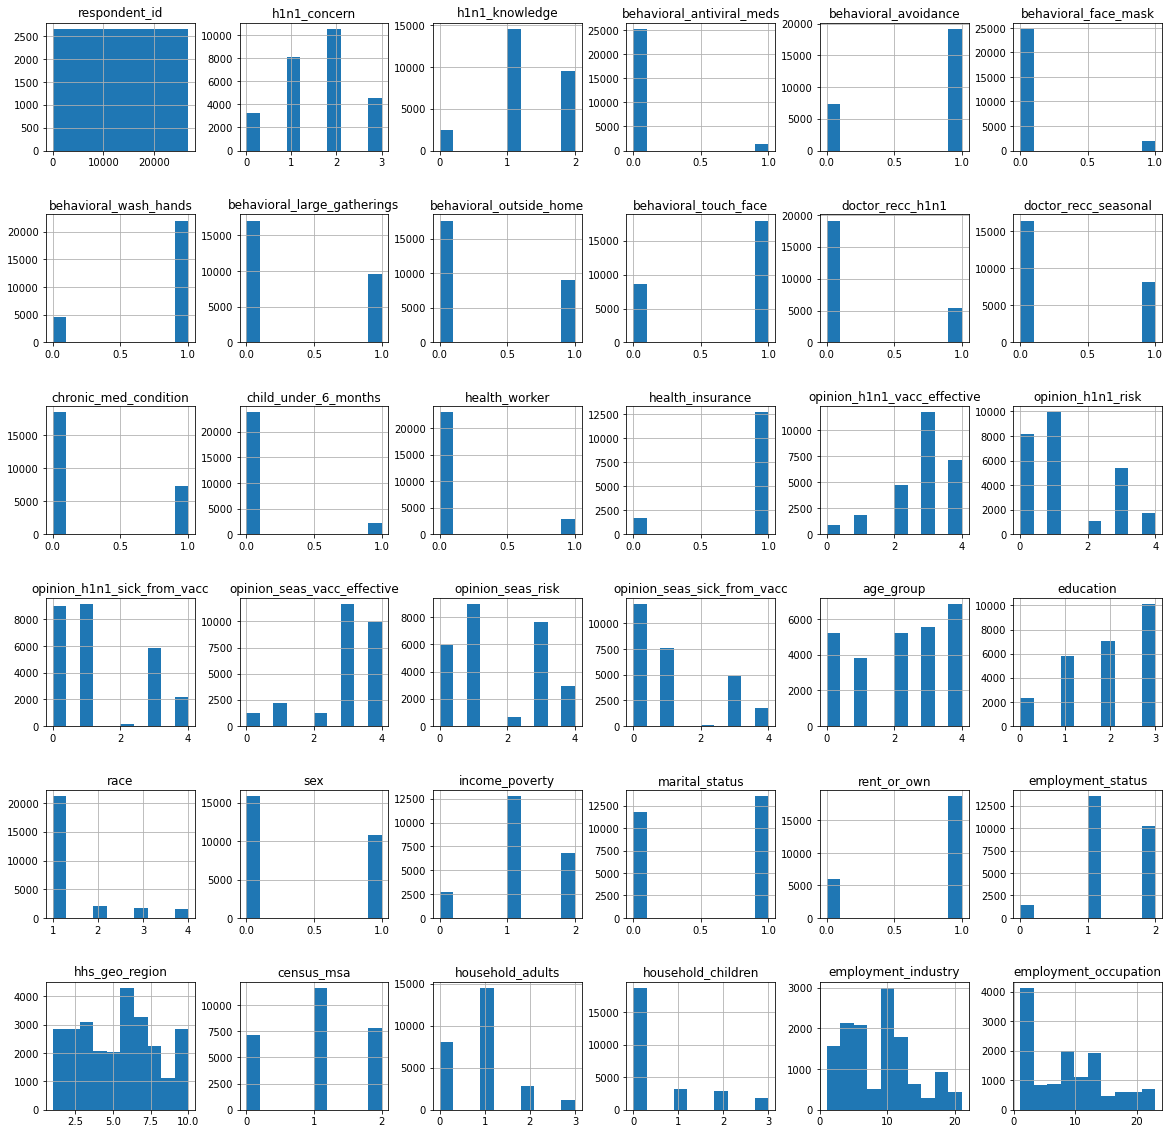

In [16]:
#visualizing distributions of all columns
flu_train3.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

## Filling NaN:

Used the mode for all columns except for health_insurance (half NaN) and employment_industry/employment_occupation (half NaN).
For these columns, instead of throwing them away just yet, I decided to create an additional 'unknown' category.

In [17]:
#creating a function to fill missing data with the mode of that column
def fillna_(df, col_lst):
    df2 = df.copy()
    for c in df2.columns:
        if c not in col_lst:
            df2[c].fillna(df2[c].mode()[0], inplace=True)  
    return df2        

In [18]:
#using this function to fill missing values in all but these 3 columns
nofill_columns = ['health_insurance', 'employment_industry', 'employment_occupation']
flu_train_cln = fillna_(flu_train3, nofill_columns)
flu_test_cln = fillna_(flu_test3, nofill_columns)

In [19]:
#filling the 3 columns with an additional 'unknown' category
flu_train_cln['health_insurance'].fillna(3, inplace=True)
flu_test_cln['health_insurance'].fillna(3, inplace=True)
flu_train_cln['employment_industry'].fillna(0, inplace=True)
flu_train_cln['employment_occupation'].fillna(0, inplace=True)
flu_test_cln['employment_occupation'].fillna(0, inplace=True)
flu_test_cln['employment_industry'].fillna(0, inplace=True)

In [20]:
#ensuring dataframe is not missing any values
flu_train_cln.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

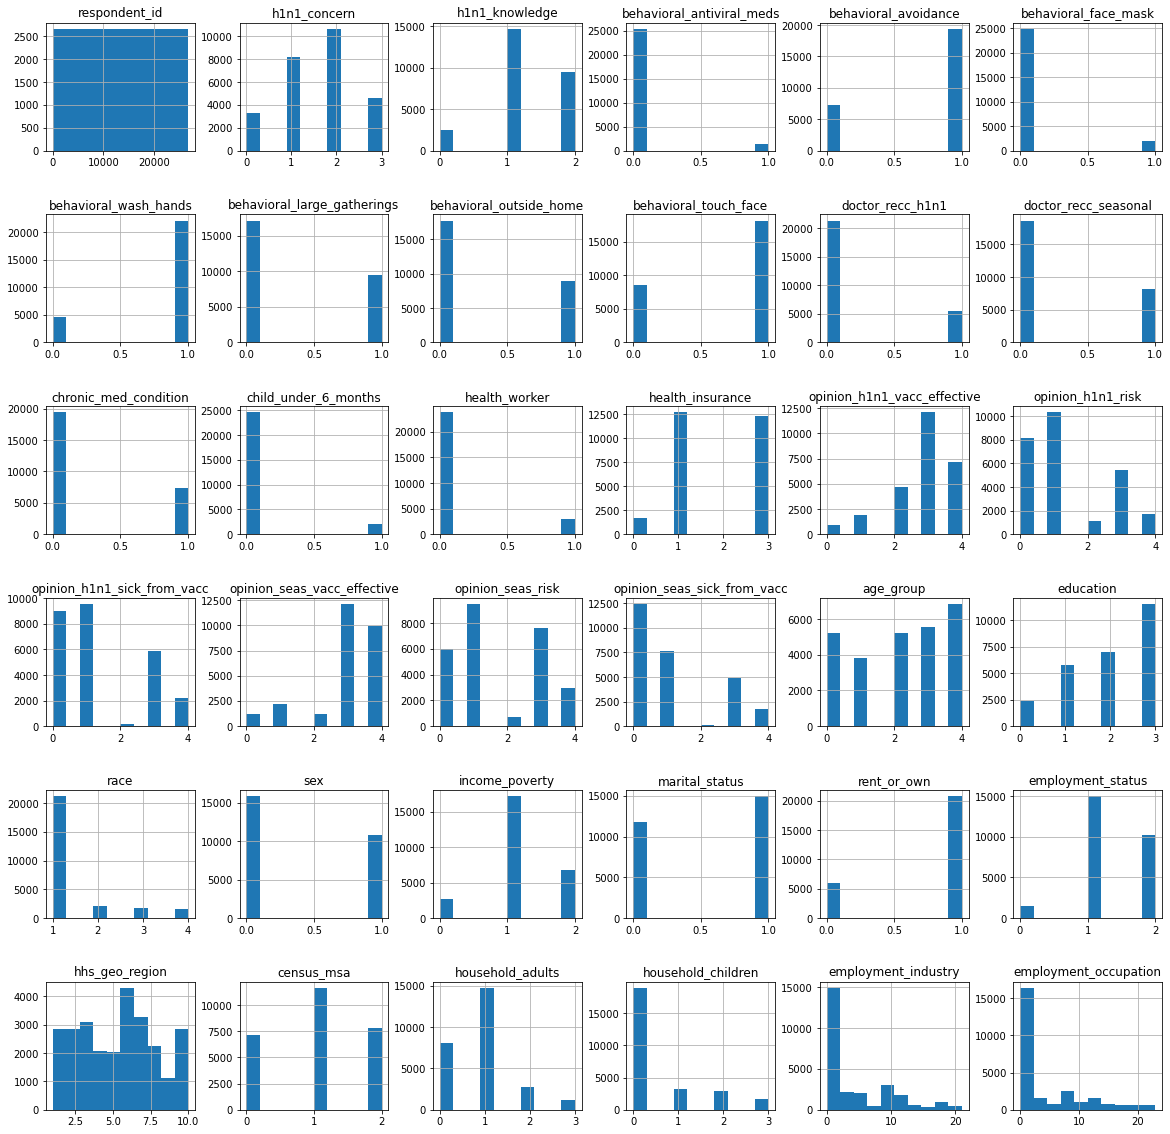

In [21]:
#visualizing how filling missing values alters distributions
flu_train_cln.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

By filling most missing data with the mode of that column, I was able to preserve the rough distribution of each column. Many of the columns did not have a normal distribution and responses seemed to be polarized to each end of the possible responses. This was especially true of the opinion data, where respondents were less often neutral. I felt that mode did a better job preserving distributions than median did.

# Cleaned Train Data (all numeric):

This dataframe has all data switched to numeric form. It will be saved for exploratory analysis but will not be useful for machine learning as many of these columns are not ordinal and the ordered integers representing each catergory are meaningless here for nominal data.

In [23]:
full_flu_train = flu_train_cln.merge(flu_train_label, on = 'respondent_id')

In [24]:
full_flu_train.to_csv('data/numeric_train', index=False)
flu_test_cln.to_csv('data/numeric_test', index=False)

# Preparing data for OneHot Encoding:

Certain columns that have binary categories or ordinal categories can be changed from string inputs to ordered integers. Columns with categories that do not have ordered categories (nominal data) are left out.

In [42]:
mapping = {'age_group' : {'18 - 34 Years': 0, '35 - 44 Years': 1, '45 - 54 Years': 2, '55 - 64 Years': 3, '65+ Years': 4},
'education' : {'< 12 Years': 0, '12 Years': 1, 'Some College': 2, 'College Graduate': 3},
'income_poverty' : {'Below Poverty': 0, '<= $75,000, Above Poverty': 1, '> $75,000': 2},
'employment_status' : {'Unemployed': 0, 'Employed':1, 'Not in Labor Force': 2},
'census_msa': {'Non-MSA':0, 'MSA, Not Principle  City':1, 'MSA, Principle City':2},
'rent_or_own' : {'Rent': 0, 'Own': 1},
'sex' : {'Female': 0, 'Male': 1},
'marital_status' : {'Not Married': 0, 'Married': 1}}



In [43]:
#using same custom mapping function from earlier to remap the ordinal data
onehot_flu_train = remap(flu_train2, mapping)
onehot_flu_test = remap(flu_test2, mapping)

In [44]:
#nominal data columns
nofill_ = ['health_insurance', 'employment_industry', 'employment_occupation', 'hhs_geo_region']

In [45]:
#using same custom NaN filling function from eariler to fill missing values in all but nominal data columns
onehot_train_cln = fillna_(onehot_flu_train, nofill_)
onehot_test_cln = fillna_(onehot_flu_test, nofill_)

In [46]:
#3 columns with lots of missing data will gain an additional 'unknown' category
onehot_train_cln['health_insurance'].fillna('unknown', inplace=True)
onehot_test_cln['health_insurance'].fillna('unknown', inplace=True)
onehot_train_cln['employment_industry'].fillna('unknown', inplace=True)
onehot_train_cln['employment_occupation'].fillna('unknown', inplace=True)
onehot_test_cln['employment_occupation'].fillna('unknown', inplace=True)
onehot_test_cln['employment_industry'].fillna('unknown', inplace=True)

## Combining the Target Value DataFrame with Train DataFrame

In [47]:
full_onehot_train = onehot_train_cln.merge(flu_train_label, on = 'respondent_id')

In [48]:
#confirming dataframe is completely clean, with no missing values and all ordinal/binary data is numeric
full_onehot_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [49]:
#saving all data that needs further processing for later machine learning models
full_onehot_train.to_csv('data/onehot_train', index=False)
onehot_test_cln.to_csv('data/onehot_test', index=False)